In [1]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("Births_data analysis.csv")

In [3]:
df.set_index("index")

,State,Month,Year,countyBirths,stateBirths,County
index,,,,,,
0,1,1,1985,36.0,5027.0,1001.0
1,1,2,1985,36.0,4627.0,1001.0
2,1,3,1985,43.0,4738.0,1001.0
3,1,4,1985,40.0,4626.0,1001.0
4,1,5,1985,34.0,4834.0,1001.0
...,...,...,...,...,...,...
101611,39,6,1987,112.0,13930.0,42073.0
101612,39,7,1987,109.0,14135.0,42073.0
101613,39,8,1987,132.0,14044.0,42073.0


In [4]:
df = df.dropna()

In [6]:
df = df.drop_duplicates()

In [7]:
z_scores = stats.zscore(df['stateBirths'] )
outliers = (z_scores > 3) | (z_scores < -3)

In [8]:
df = df[~outliers]

In [9]:
df.describe()

,index,State,Month,Year,countyBirths,stateBirths,County
count,80709.000000,80709.000000,80709.000000,80709.000000,80709.000000,80709.000000,80709.000000
mean,50724.046166,25.785092,6.509175,1985.891189,110.384616,7838.747525,28822.665155
std,29337.125176,13.658949,3.440570,0.788733,345.543511,6209.175914,14501.490456
min,0.000000,1.000000,1.000000,1985.000000,10.000000,576.000000,36.000000
25%,25197.000000,15.000000,4.000000,1985.000000,19.000000,3592.000000,18077.000000
50%,50865.000000,25.000000,7.000000,1986.000000,36.000000,6027.000000,28033.000000
75%,75691.000000,37.000000,9.000000,1987.000000,81.000000,9222.000000,40061.000000
max,101614.000000,51.000000,12.000000,1987.000000,10846.000000,28064.000000,56045.000000


In [10]:
z_scores = stats.zscore(df['countyBirths'] )
outliers = (z_scores > 3) | (z_scores < -3)

In [11]:
df = df[~outliers]

In [12]:
df.describe()

,index,State,Month,Year,countyBirths,stateBirths,County
count,79886.000000,79886.000000,79886.000000,79886.000000,79886.000000,79886.000000,79886.000000
mean,50702.885349,25.748579,6.507824,1985.891258,87.141752,7779.959342,28800.871079
std,29340.848803,13.662107,3.441723,0.788780,150.127768,6170.616227,14493.853744
min,0.000000,1.000000,1.000000,1985.000000,10.000000,576.000000,1001.000000
25%,25182.250000,15.000000,4.000000,1985.000000,19.000000,3567.000000,18077.000000
50%,50819.500000,25.000000,7.000000,1986.000000,36.000000,5988.000000,28031.000000
75%,75685.750000,37.000000,9.000000,1987.000000,79.000000,8987.000000,40051.000000
max,101614.000000,51.000000,12.000000,1987.000000,1146.000000,28064.000000,56045.000000


In [13]:
print(df[['countyBirths', 'stateBirths']].describe())

       countyBirths   stateBirths
count  79886.000000  79886.000000
mean      87.141752   7779.959342
std      150.127768   6170.616227
min       10.000000    576.000000
25%       19.000000   3567.000000
50%       36.000000   5988.000000
75%       79.000000   8987.000000
max     1146.000000  28064.000000


Correlation Matrix:
              countyBirths  stateBirths
countyBirths      1.000000     0.106437
stateBirths       0.106437     1.000000


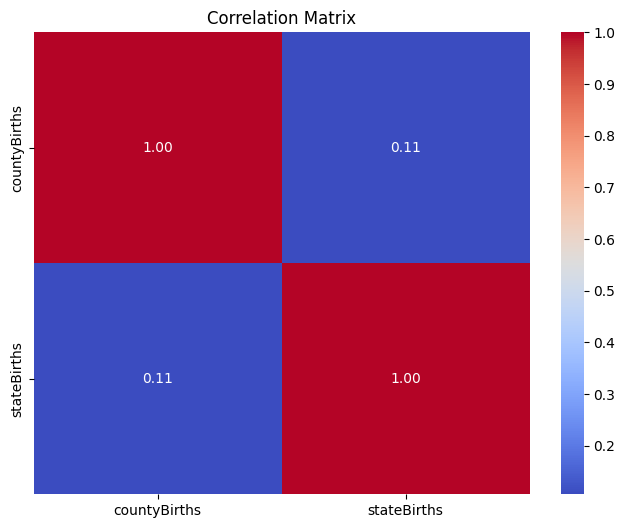

In [39]:
columns_for_correlation = ['countyBirths', 'stateBirths']
correlation_matrix = df[columns_for_correlation].corr()
print("Correlation Matrix:")
print(correlation_matrix)
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

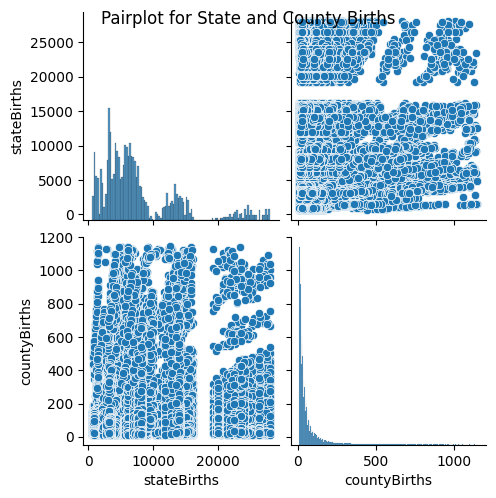

In [28]:
sns.pairplot(df[['stateBirths', 'countyBirths']])

plt.suptitle('Pairplot for State and County Births')
plt.show()

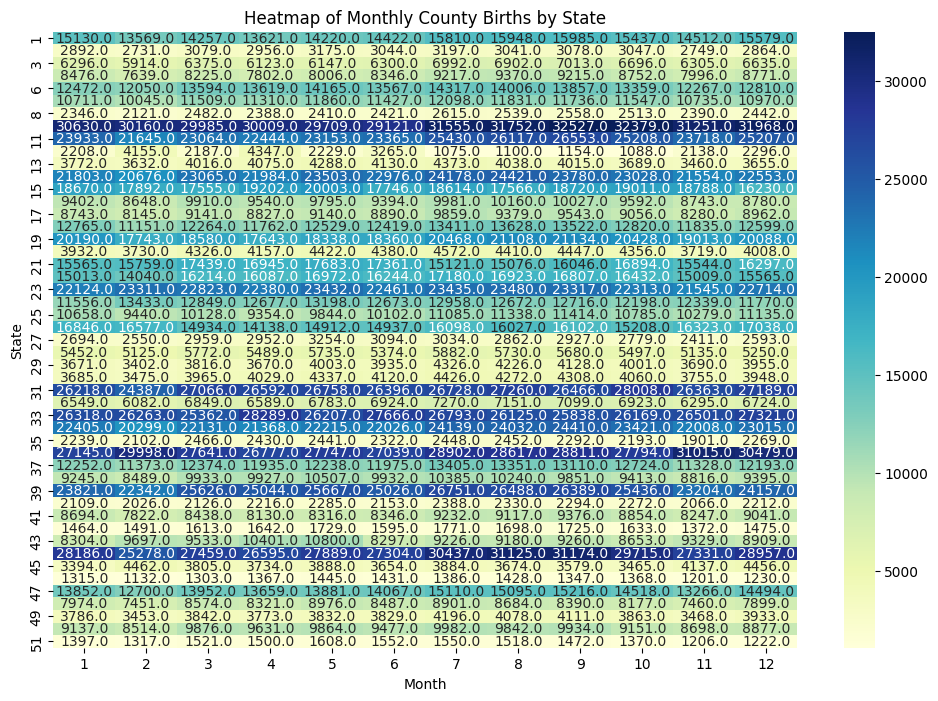

In [33]:
heatmap_data = df.pivot_table(values='countyBirths', index='State', columns='Month', aggfunc='sum')

# Plotting heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt=".1f")
plt.title('Heatmap of Monthly County Births by State')
plt.xlabel('Month')
plt.ylabel('State')
plt.show()

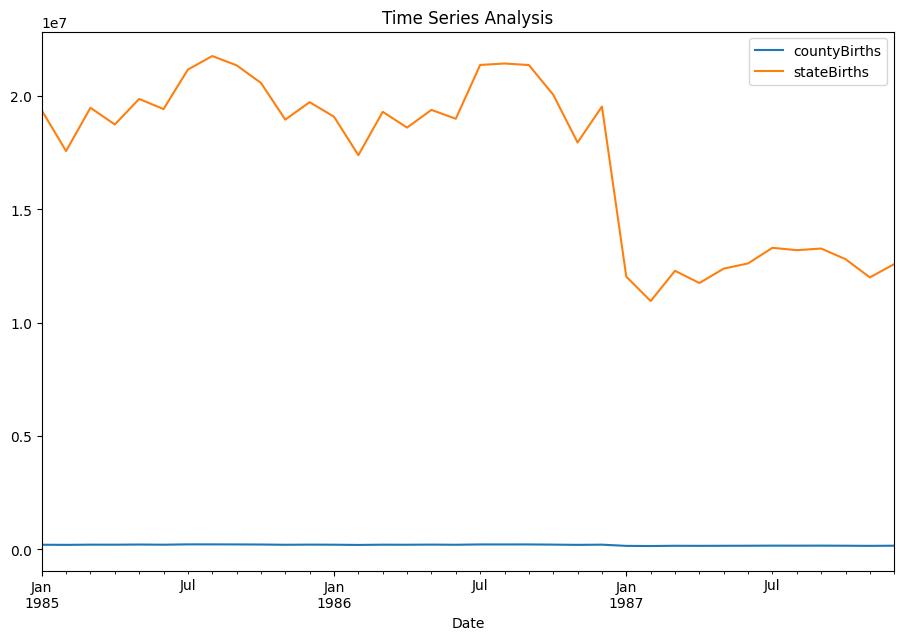

In [25]:
df['Date'] = pd.to_datetime(df[['Year', 'Month']].assign(DAY=1))
time_series_df = df.groupby('Date').agg({'countyBirths': 'sum', 'stateBirths': 'sum'})
time_series_df.plot(title='Time Series Analysis', figsize=(11, 7))
plt.show()

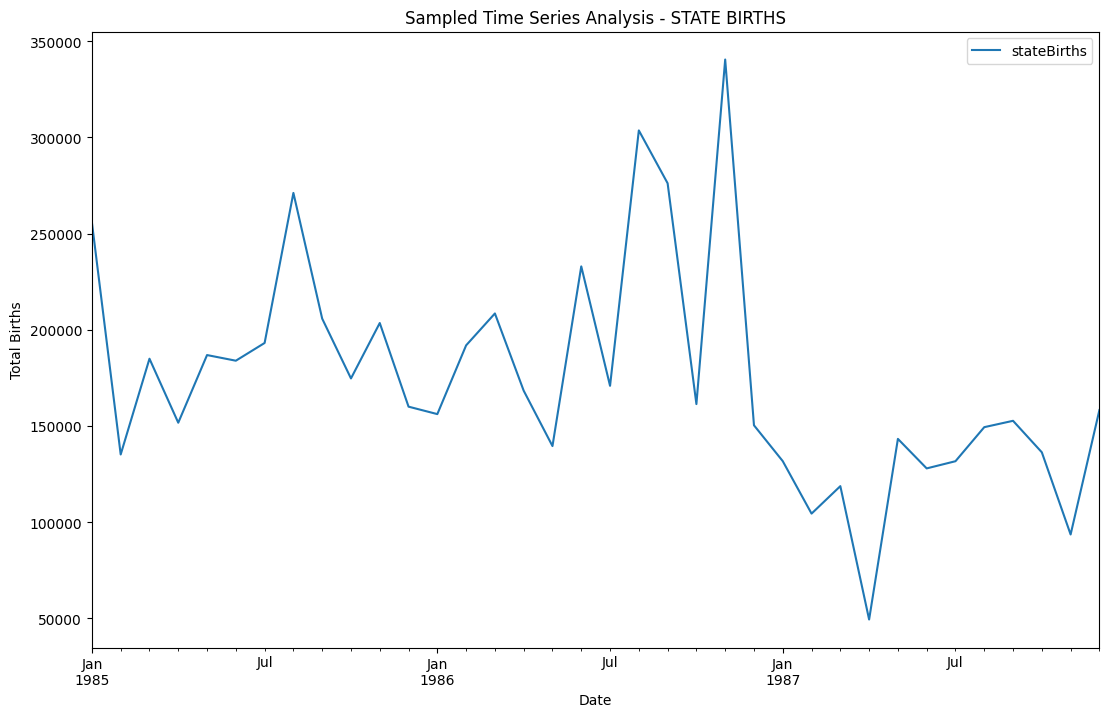

In [16]:
sampled_df = df.sample(frac=0.01)
sampled_df.groupby('Date').agg({'stateBirths': 'sum'}).plot(title='Sampled Time Series Analysis - STATE BIRTHS', figsize=(13, 8))
plt.xlabel('Date')
plt.ylabel('Total Births')
plt.show()

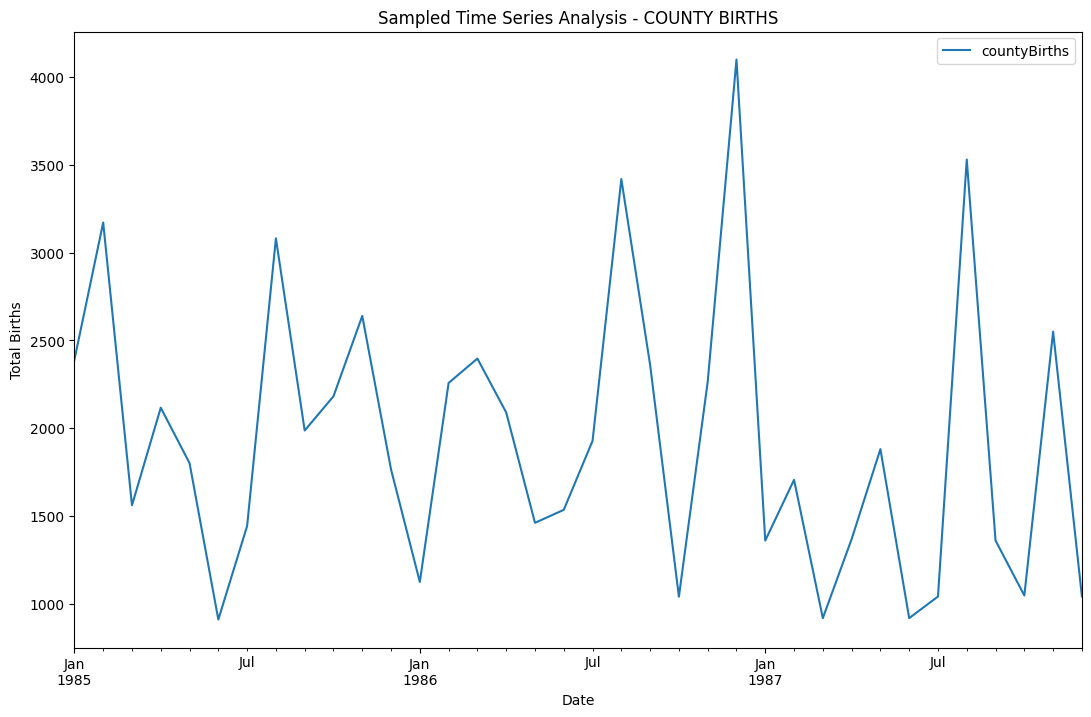

In [17]:
sampled_df = df.sample(frac=0.01)
sampled_df.groupby('Date').agg({'countyBirths': 'sum'}).plot(title='Sampled Time Series Analysis - COUNTY BIRTHS',figsize=(13, 8))
plt.xlabel('Date')
plt.ylabel('Total Births')
plt.show()

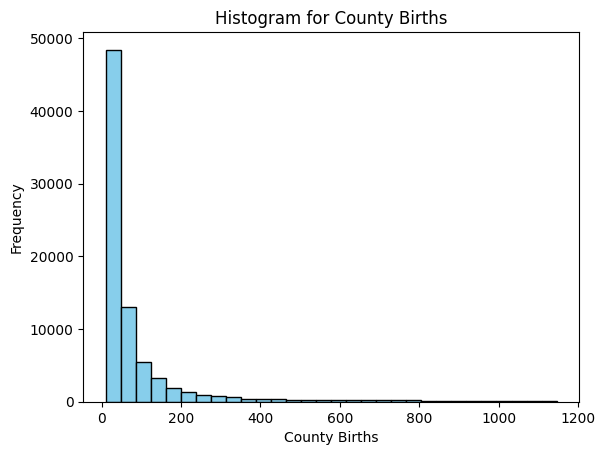

In [37]:
plt.hist(df['countyBirths'], bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram for County Births')
plt.xlabel('County Births')
plt.ylabel('Frequency')
plt.show()

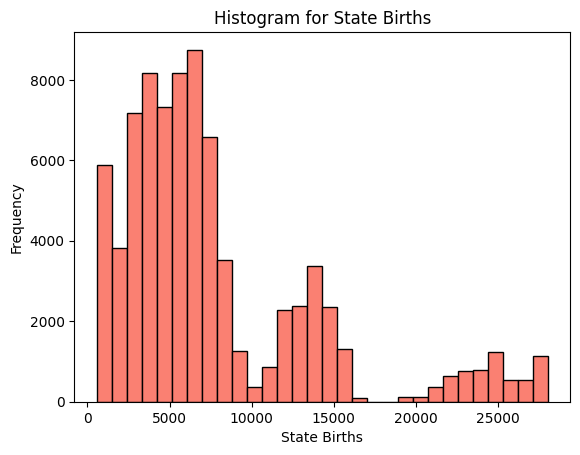

In [38]:
plt.hist(df['stateBirths'], bins=30, color='salmon', edgecolor='black')
plt.title('Histogram for State Births')
plt.xlabel('State Births')
plt.ylabel('Frequency')
plt.show()

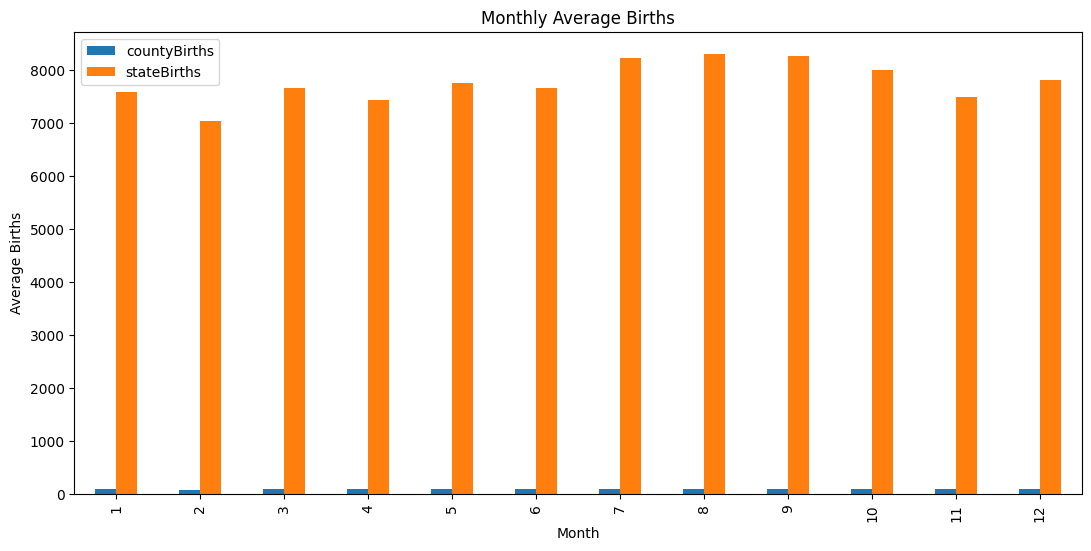

In [18]:

monthly_avg_births = df.groupby('Month')[['countyBirths', 'stateBirths']].mean()
monthly_avg_births.plot(kind='bar', title='Monthly Average Births',figsize=(13, 6))
plt.xlabel('Month')
plt.ylabel('Average Births')
plt.show()

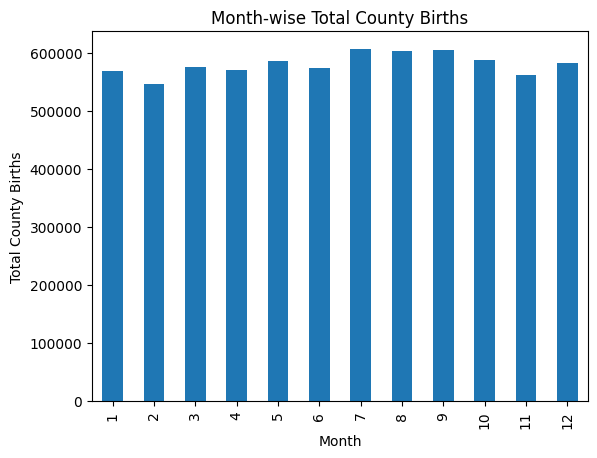

In [34]:
month_births_distribution = df.groupby('Month')['countyBirths'].sum()
month_births_distribution.plot(kind='bar', title='Month-wise Total County Births')
plt.xlabel('Month')
plt.ylabel('Total County Births')
plt.show()

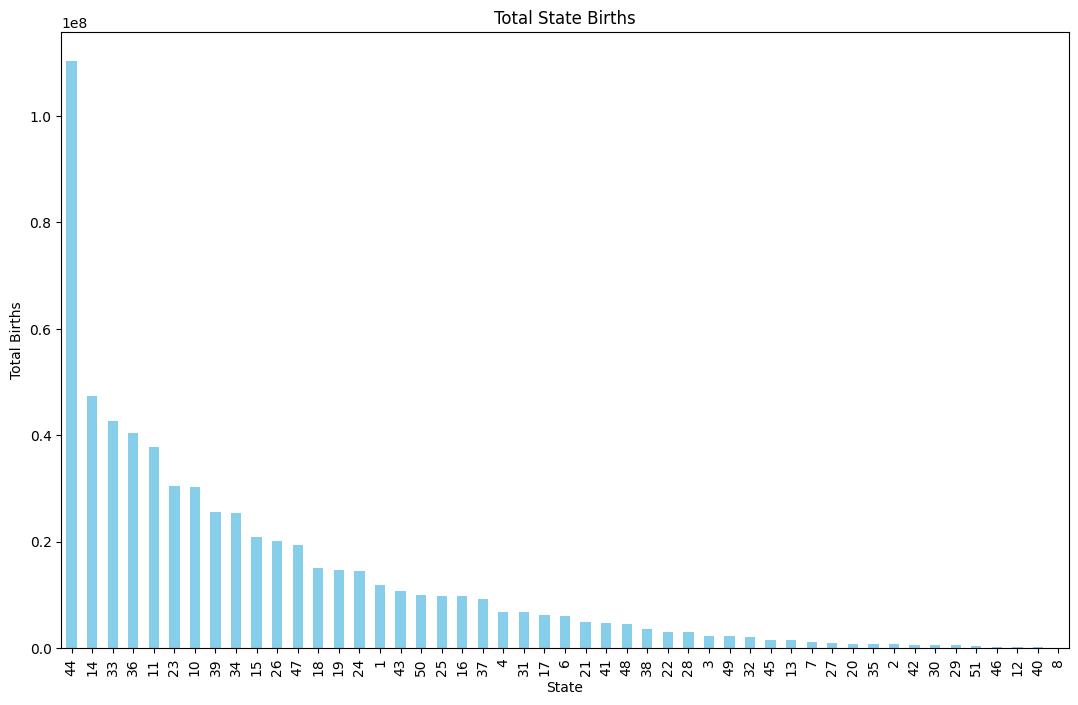

In [19]:
plt.figure(figsize=(13, 8))
state_total_births = df.groupby('State')['stateBirths'].sum().sort_values(ascending=False)
state_total_births.plot(kind='bar', color='skyblue')

plt.title('Total State Births')
plt.xlabel('State')
plt.ylabel('Total Births')
plt.show()

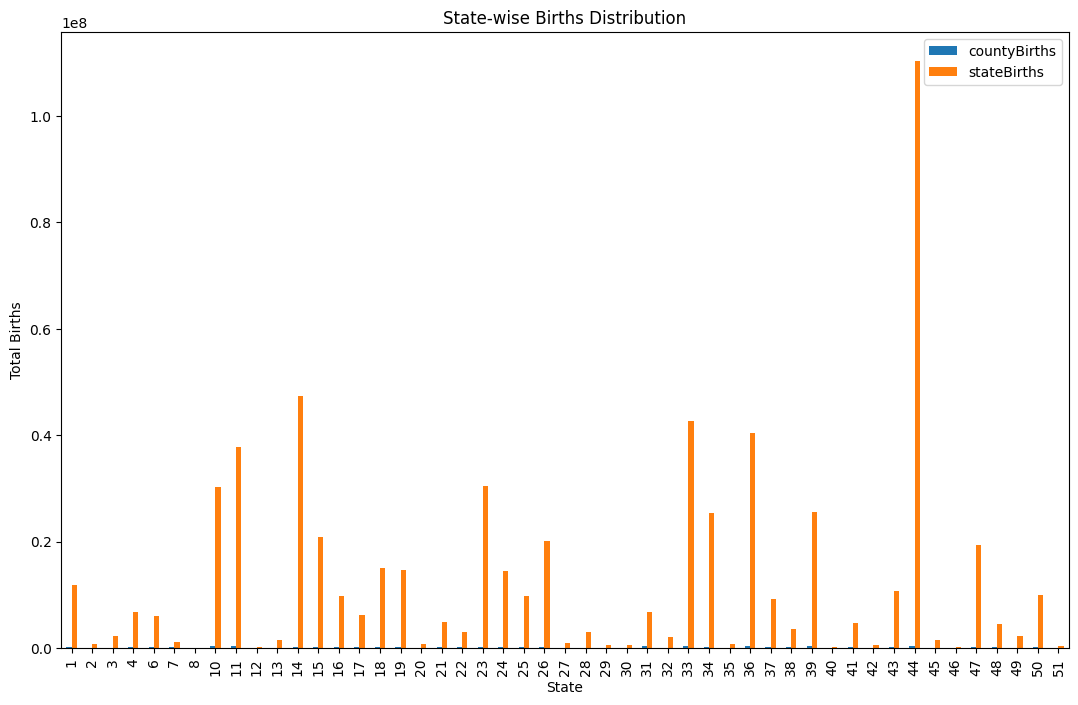

In [21]:

state_births_distribution = df.groupby('State')[['countyBirths', 'stateBirths']].sum()
state_births_distribution.plot(kind='bar', title='State-wise Births Distribution', figsize=(13, 8))
plt.xlabel('State')
plt.ylabel('Total Births')
plt.show()

In [22]:
correlation_matrix = df[['countyBirths', 'stateBirths']].corr()
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
              countyBirths  stateBirths
countyBirths      1.000000     0.106437
stateBirths       0.106437     1.000000


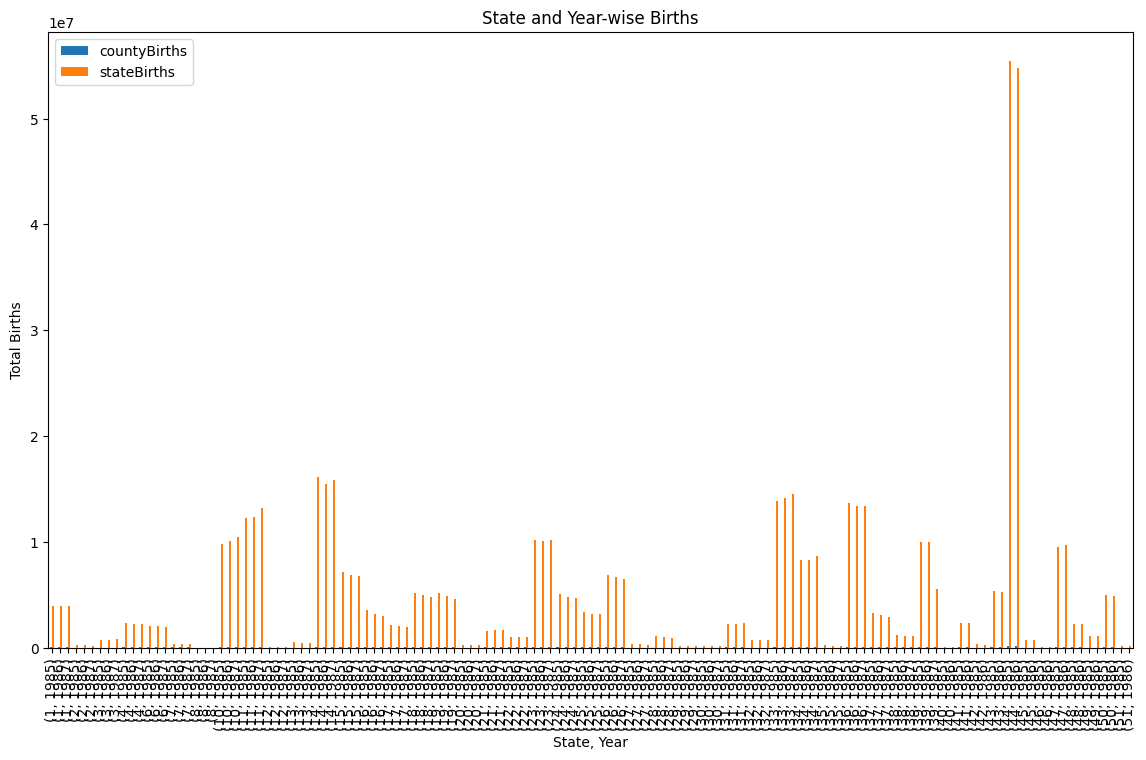

In [32]:
state_yearly_births = df.groupby(['State', 'Year']).agg({'countyBirths': 'sum', 'stateBirths': 'sum'})
state_yearly_births.plot(kind='bar', title='State and Year-wise Births' , figsize=(14, 8))

plt.xlabel('State, Year')
plt.ylabel('Total Births')
plt.show()